In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/delhiaqi.csv')

In [ ]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [ ]:
df.shape

(561, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    561 non-null    datetime64[ns]
 1   co      561 non-null    float64       
 2   no      561 non-null    float64       
 3   no2     561 non-null    float64       
 4   o3      561 non-null    float64       
 5   so2     561 non-null    float64       
 6   pm2_5   561 non-null    float64       
 7   pm10    561 non-null    float64       
 8   nh3     561 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 39.6 KB


In [ ]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [ ]:
df.isnull().sum()

,0
date,0
co,0
no,0
no2,0
o3,0
so2,0
pm2_5,0
pm10,0
nh3,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.corr()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
date,1.000000,-0.188192,-0.125721,-0.156456,0.045296,-0.069880,-0.257436,-0.220312,-0.036552
co,-0.188192,1.000000,0.969740,0.776402,-0.463082,0.716831,0.953083,0.966801,0.826299
no,-0.125721,0.969740,1.000000,0.702201,-0.377813,0.734503,0.888810,0.903339,0.823638
no2,-0.156456,0.776402,0.702201,1.000000,-0.407177,0.734961,0.698696,0.720050,0.700254
o3,0.045296,-0.463082,-0.377813,-0.407177,1.000000,-0.049158,-0.450458,-0.468477,-0.299663
so2,-0.069880,0.716831,0.734503,0.734961,-0.049158,1.000000,0.648996,0.658325,0.843635
pm2_5,-0.257436,0.953083,0.888810,0.698696,-0.450458,0.648996,1.000000,0.994088,0.720303
pm10,-0.220312,0.966801,0.903339,0.720050,-0.468477,0.658325,0.994088,1.000000,0.754468
nh3,-0.036552,0.826299,0.823638,0.700254,-0.299663,0.843635,0.720303,0.754468,1.000000


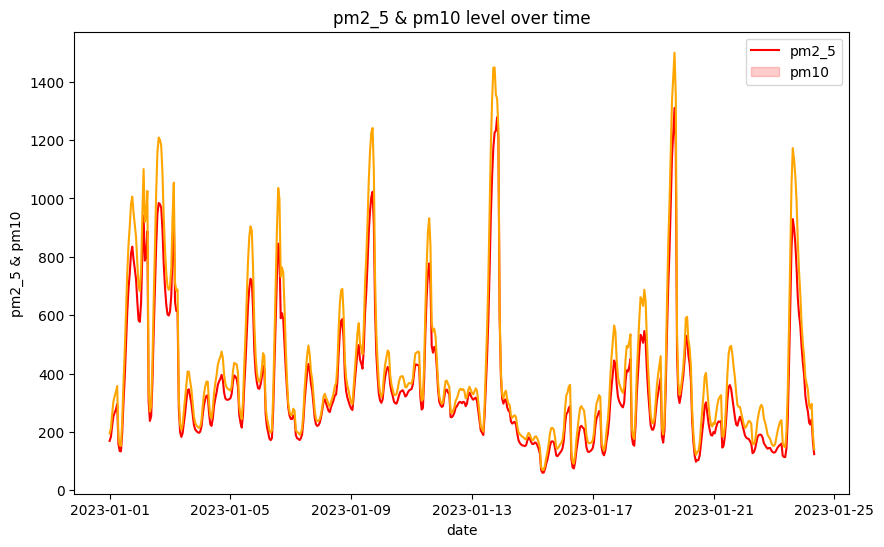

In [ ]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='date', y='pm2_5',data= df, color='red')
sns.lineplot(x='date', y='pm10',data= df, color='orange')

plt.xlabel('date')
plt.ylabel('pm2_5 & pm10')
plt.title('pm2_5 & pm10 level over time')
plt.legend(['pm2_5', 'pm10'])

plt.show()

In [ ]:
df['week'] = df['date'].dt.isocalendar().week

In [ ]:
weekly_df = df.groupby('week')[['pm2_5', 'pm10', 'co','no',	'no2', 'o3',	'so2','nh3']].mean().reset_index()

In [ ]:
weekly_df.head()

,week,pm2_5,pm10,co,no,no2,o3,so2,nh3
0,1,406.534762,471.023631,4190.683333,52.830714,80.098512,27.353452,60.376667,21.519286
1,2,369.237321,418.176310,3649.632381,48.053631,70.252083,35.886012,63.132440,24.094167
2,3,285.133512,349.163631,3262.321369,41.791845,74.195179,28.827024,65.884226,27.900060
3,4,366.518788,463.286364,4019.390606,62.033939,69.022121,28.226667,60.595455,28.800303
4,52,443.940000,535.040417,5929.152500,112.348750,93.236250,21.290833,102.260417,63.490833


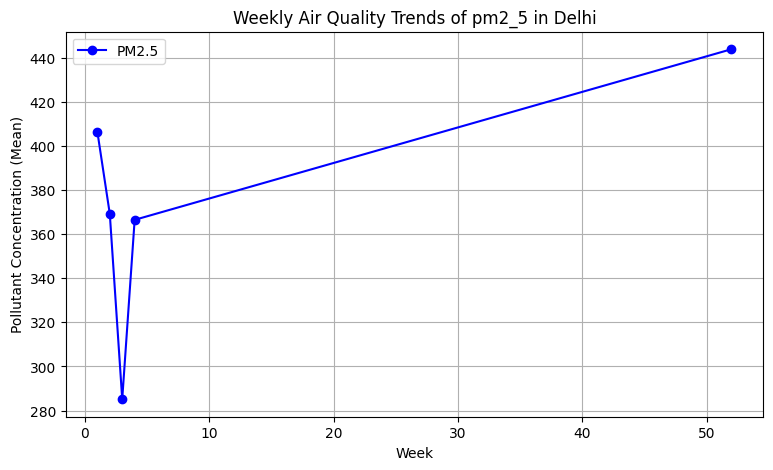

In [ ]:
plt.figure(figsize=(9, 5))

plt.plot(weekly_df['week'], weekly_df['pm2_5'], marker='o', label='PM2.5', color = 'blue')

plt.xlabel('Week')
plt.ylabel('Pollutant Concentration (Mean)')
plt.title('Weekly Air Quality Trends of pm2_5 in Delhi')
plt.legend()
plt.grid(True)

plt.show()

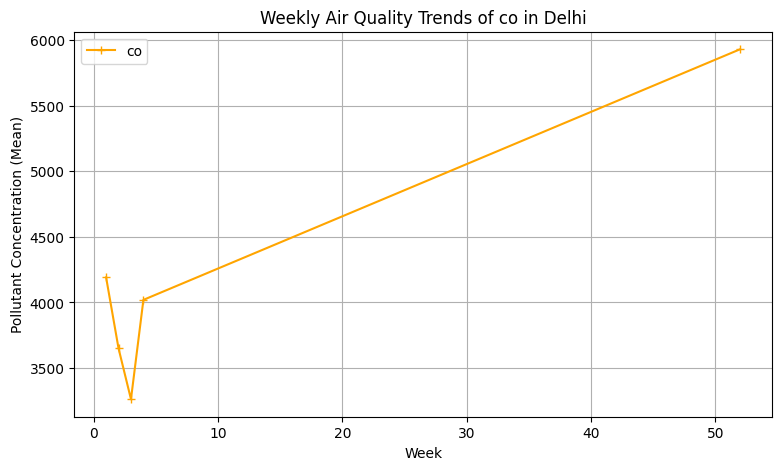

In [ ]:
plt.figure(figsize=(9, 5))

plt.plot(weekly_df['week'], weekly_df['co'], marker='+', color= 'orange', label='co')

plt.xlabel('Week')
plt.ylabel('Pollutant Concentration (Mean)')
plt.title('Weekly Air Quality Trends of co in Delhi')
plt.legend()
plt.grid(True)

plt.show()

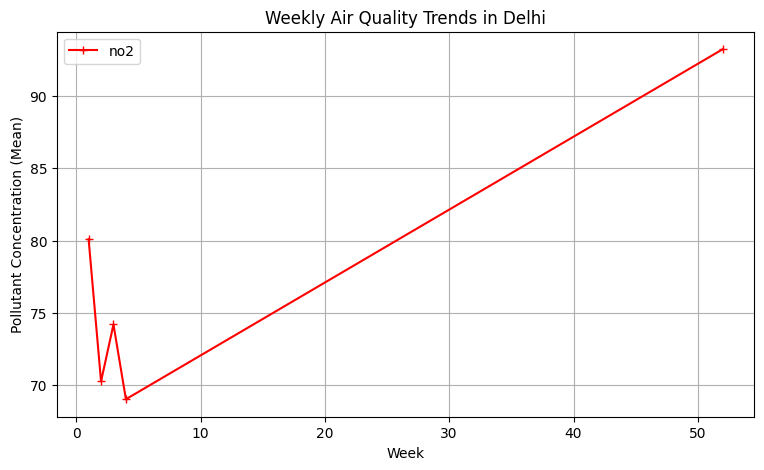

In [ ]:
plt.figure(figsize=(9, 5))

plt.plot(weekly_df['week'], weekly_df['no2'], marker='+', color='red', label='no2')

plt.xlabel('Week')
plt.ylabel('Pollutant Concentration (Mean)')
plt.title('Weekly Air Quality Trends in Delhi')
plt.legend()
plt.grid(True)

plt.show()

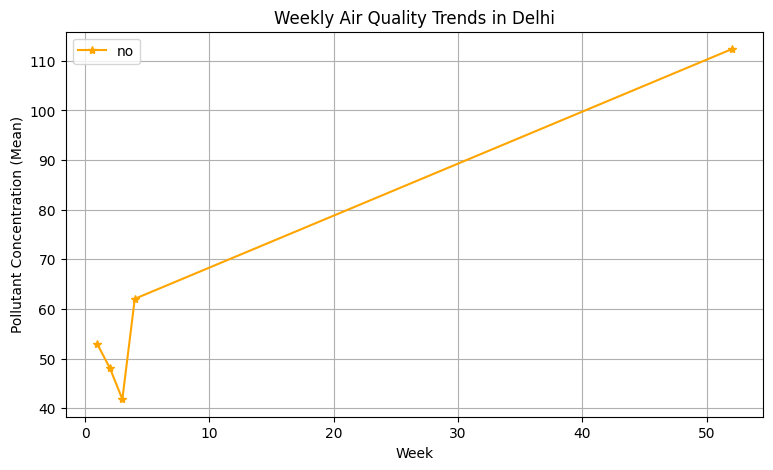

In [ ]:
plt.figure(figsize=(9, 5))

plt.plot(weekly_df['week'], weekly_df['no'], marker='*', color= 'orange', label='no')

plt.xlabel('Week')
plt.ylabel('Pollutant Concentration (Mean)')
plt.title('Weekly Air Quality Trends in Delhi')
plt.legend()
plt.grid(True)

plt.show()

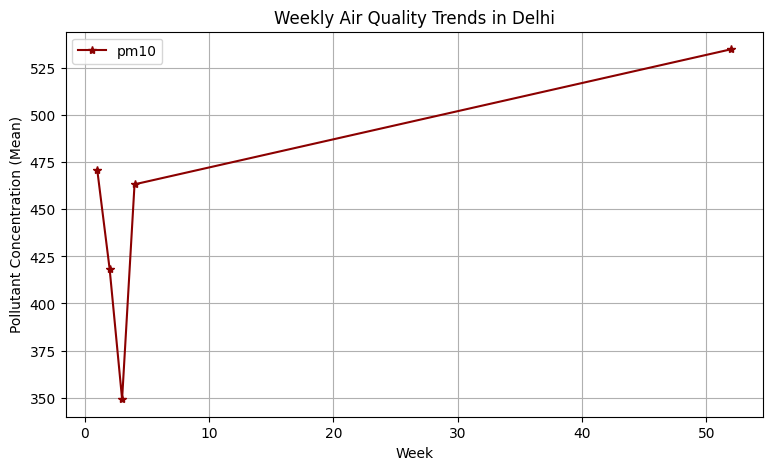

In [ ]:
plt.figure(figsize=(9, 5))

plt.plot(weekly_df['week'], weekly_df['pm10'], marker='*', color= 'darkred', label='pm10')

plt.xlabel('Week')
plt.ylabel('Pollutant Concentration (Mean)')
plt.title('Weekly Air Quality Trends in Delhi')
plt.legend()
plt.grid(True)

plt.show()

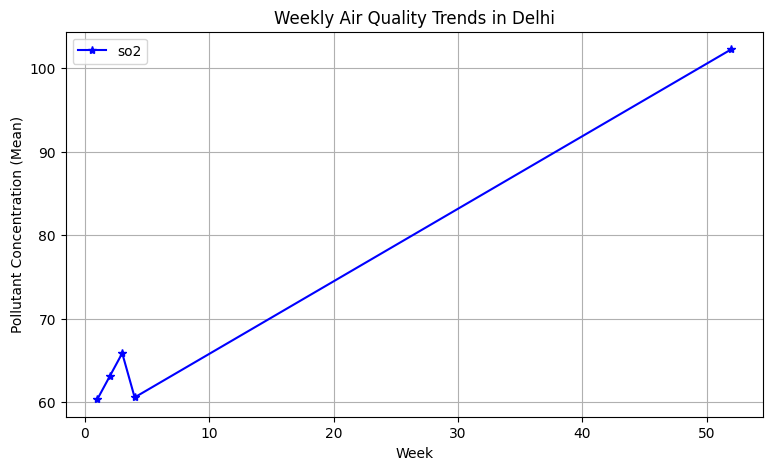

In [ ]:
plt.figure(figsize=(9, 5))

plt.plot(weekly_df['week'], weekly_df['so2'], marker='*', color= 'blue', label='so2')

plt.xlabel('Week')
plt.ylabel('Pollutant Concentration (Mean)')
plt.title('Weekly Air Quality Trends in Delhi')
plt.legend()
plt.grid(True)

plt.show()

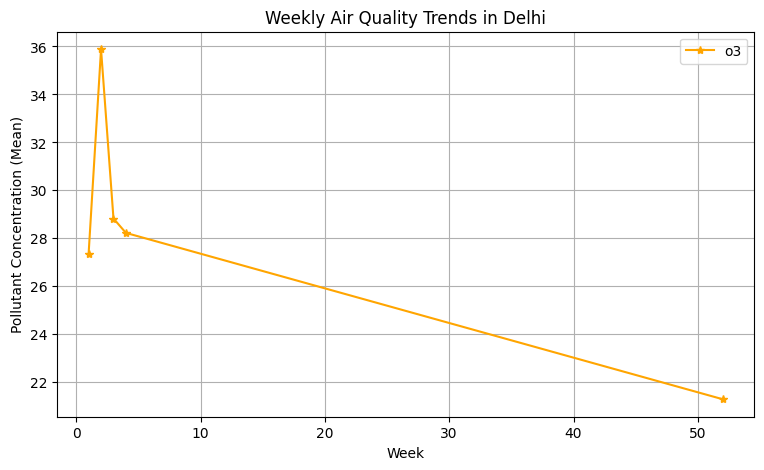

In [ ]:
plt.figure(figsize=(9, 5))

plt.plot(weekly_df['week'], weekly_df['o3'], marker='*', color= 'orange', label='o3')

plt.xlabel('Week')
plt.ylabel('Pollutant Concentration (Mean)')
plt.title('Weekly Air Quality Trends in Delhi')
plt.legend()
plt.grid(True)

plt.show()

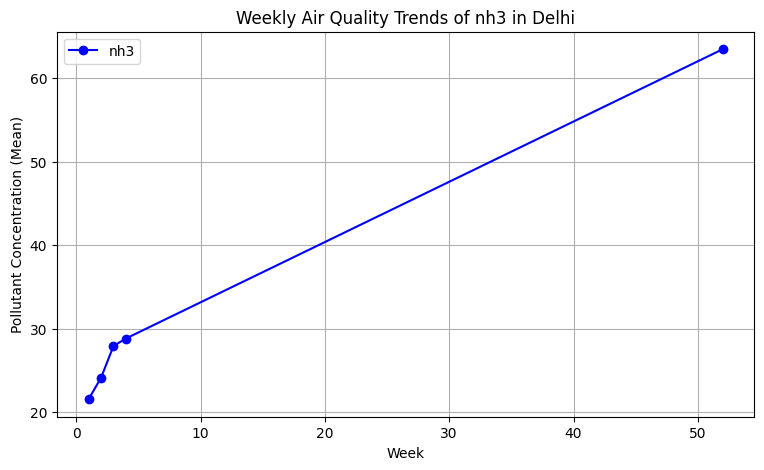

In [ ]:
plt.figure(figsize=(9, 5))

plt.plot(weekly_df['week'], weekly_df['nh3'], marker='o', label='nh3', color = 'blue')

plt.xlabel('Week')
plt.ylabel('Pollutant Concentration (Mean)')
plt.title('Weekly Air Quality Trends of nh3 in Delhi')
plt.legend()
plt.grid(True)

plt.show()

#### As we can see from the above graphs the weekely trend or fluctuation of pm2_5, pm10, co, no,	no2, o3 and so2 we can see that on the 52nd week of 2022 the AQI is the highest and as we enter the New Year(2023) the AQI starts to get decrease it can be because of the following reasons:
#### 1. In the 52nd week of the Year 2022, the AQI is high, which can be due to winter conditions, which trap pollutants due to low temperatures and weak wind circulation.
#### 2. A downward trend in AQI levels is observed, suggesting improved air quality in the first few weeks of the New Year.

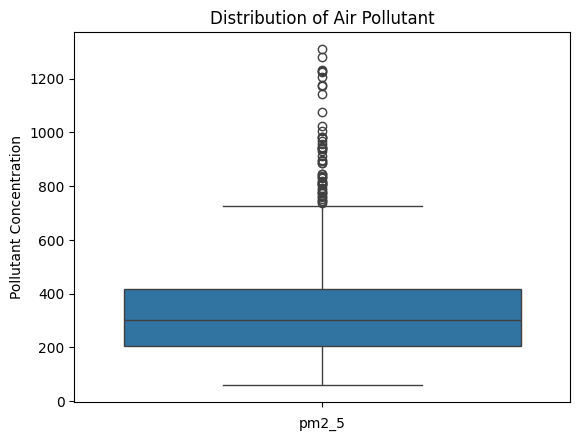

In [ ]:
sns.boxplot(data=df['pm2_5'])

plt.title("Distribution of Air Pollutant")
plt.ylabel("Pollutant Concentration")
plt.xlabel("pm2_5")

plt.show()

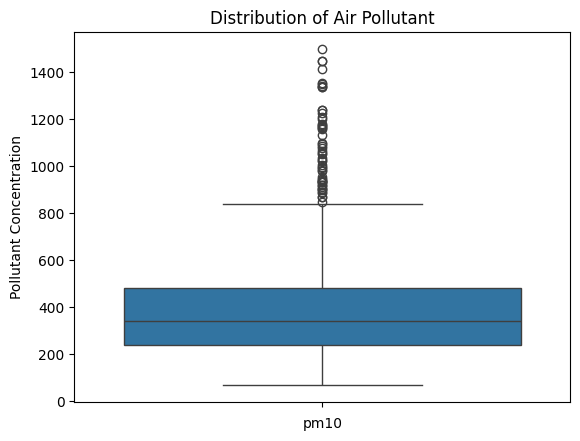

In [ ]:
sns.boxplot(data=df['pm10'])

plt.title("Distribution of Air Pollutant")
plt.ylabel("Pollutant Concentration")
plt.xlabel("pm10")

plt.show()

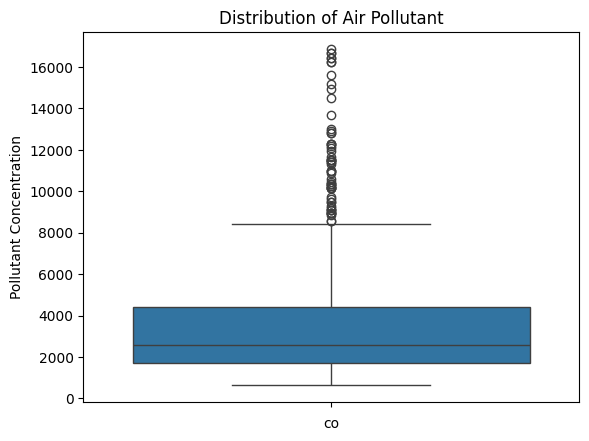

In [ ]:
sns.boxplot(data=df['co'])

plt.title("Distribution of Air Pollutant")
plt.ylabel("Pollutant Concentration")
plt.xlabel("co")

plt.show()

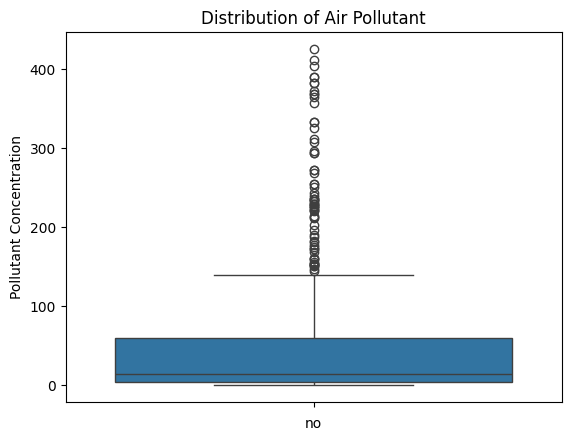

In [ ]:
sns.boxplot(data=df['no'])

plt.title("Distribution of Air Pollutant")
plt.ylabel("Pollutant Concentration")
plt.xlabel("no")

plt.show()

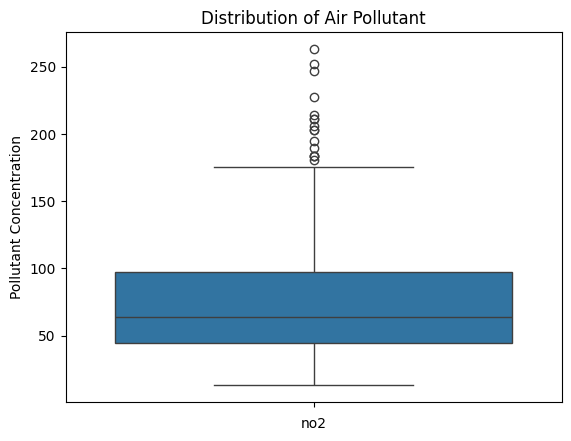

In [ ]:
sns.boxplot(data=df['no2'])

plt.title("Distribution of Air Pollutant")
plt.ylabel("Pollutant Concentration")
plt.xlabel("no2")

plt.show()

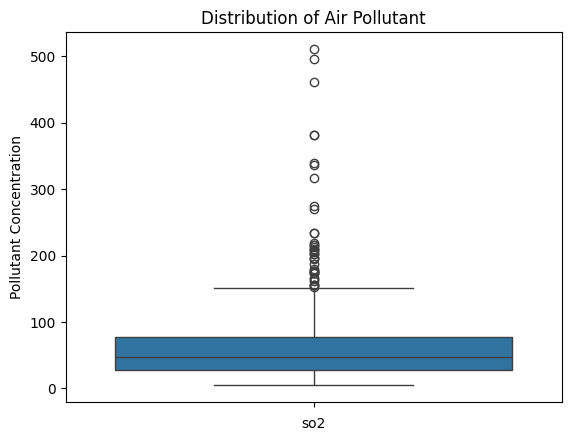

In [ ]:
sns.boxplot(data=df['so2'])

plt.title("Distribution of Air Pollutant")
plt.ylabel("Pollutant Concentration")
plt.xlabel("so2")

plt.show()

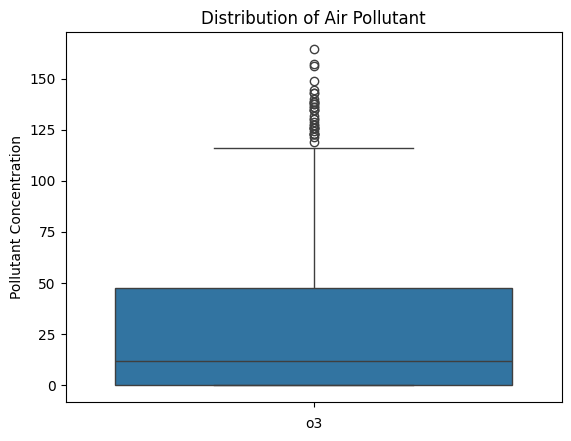

In [ ]:
sns.boxplot(data=df['o3'])

plt.title("Distribution of Air Pollutant")
plt.ylabel("Pollutant Concentration")
plt.xlabel("o3")

plt.show()

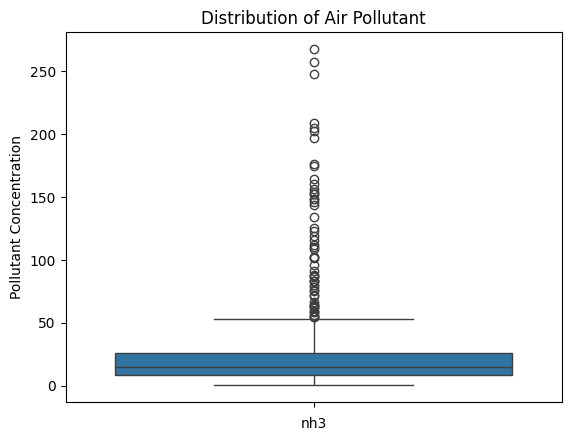

In [ ]:
sns.boxplot(data=df['nh3'])

plt.title("Distribution of Air Pollutant")
plt.ylabel("Pollutant Concentration")
plt.xlabel("nh3")

plt.show()

#### Key Takeaways
#### 1. Outliers - These indicate extreme pollution spikes(e.g., Diwali, winter smog, industrial emissions).
#### 2. A taller box indicates high fluctuation, while a shorter one means consistent AQI levels.

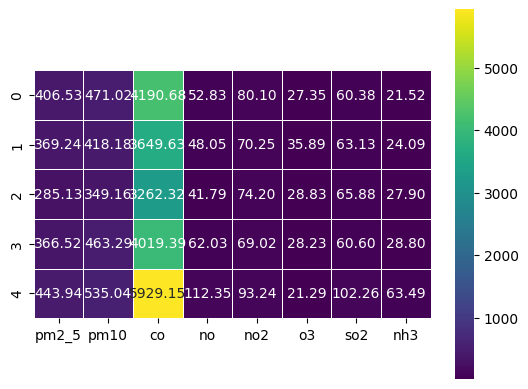

In [ ]:
corr = weekly_df[['pm2_5', 'pm10', 'co','no',	'no2', 'o3',	'so2', 'nh3']]
sns.heatmap(corr, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5, square=True)
plt.show()

##co (Carbon Monoxide) has the highest values (shown in bright yellow).
#### 1. co levels are significantly higher compared to other pollutants.
#### 2. This shows the large source of co pollution from Vehicle emissions or industrial activities.

##  PM2.5 and PM10 values are moderate.
#### 1. These are key airborne particulate pollutants that contribute to air quality issues.
#### 2. Their values are stable across observations.

## Other Pollutants (no,no2,o3,so2)
#### 1. These Pollutants fluctuate slightly but remain lower compared to co and pm pollutants.
#### 2. no and no2 may be related to vehicular pollution.

In [ ]:
x = df.drop(['date', 'week'], axis=1)
x

,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19
...,...,...,...,...,...,...,...,...
556,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
557,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
558,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
559,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [ ]:
x.mean()

,0
co,3814.942210
no,51.181979
no2,75.292496
o3,30.141943
so2,64.655936
pm2_5,358.256364
pm10,420.988414
nh3,26.425062


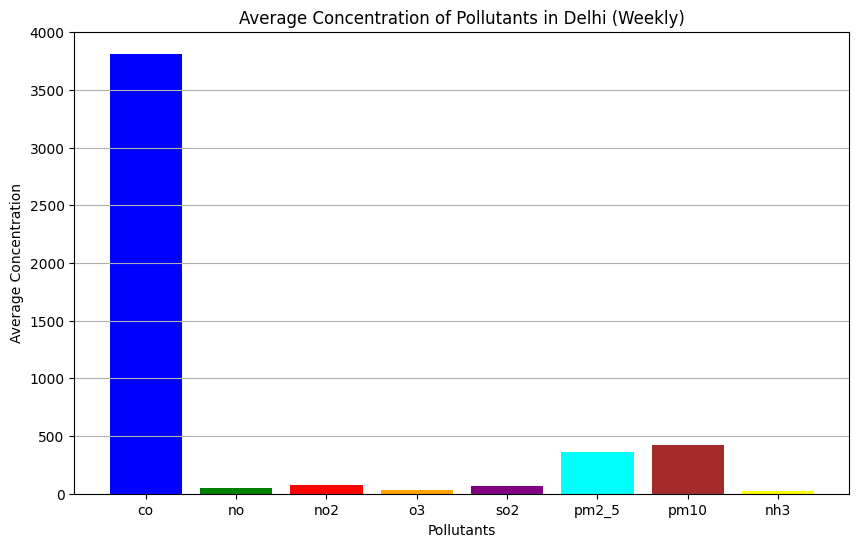

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(x.columns,x.mean() , color=['blue', 'green', 'red', 'orange', 'purple', 'cyan', 'brown', 'yellow'])

plt.xlabel("Pollutants")
plt.ylabel("Average Concentration")
plt.title("Average Concentration of Pollutants in Delhi (Weekly)")
plt.grid(axis='y')

plt.show()


#### The most concentrated pollutant is co
#### On comparing pm2_5 and pm10 - they are found in high quantity suggesting major air pollution from dust, construction, and industrial activities.
#### no2, so2 and no have lower but notable levels